In [56]:
from Stock_Data_Class import StockData
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt


$\textbf{Data Processing}$

Current Tickers in dataframe :  ['AAPL' 'AMZN' 'BA' 'CVX' 'DIS' 'DOW' 'GS' 'JNJ' 'JPM' 'KO' 'MCD' 'MMM'
 'MRK' 'MSFT' 'NKE' 'PFE' 'PG' 'SPG' 'T' 'WFC' 'XOM' '^SPX']
1980-12-12 00:00:00


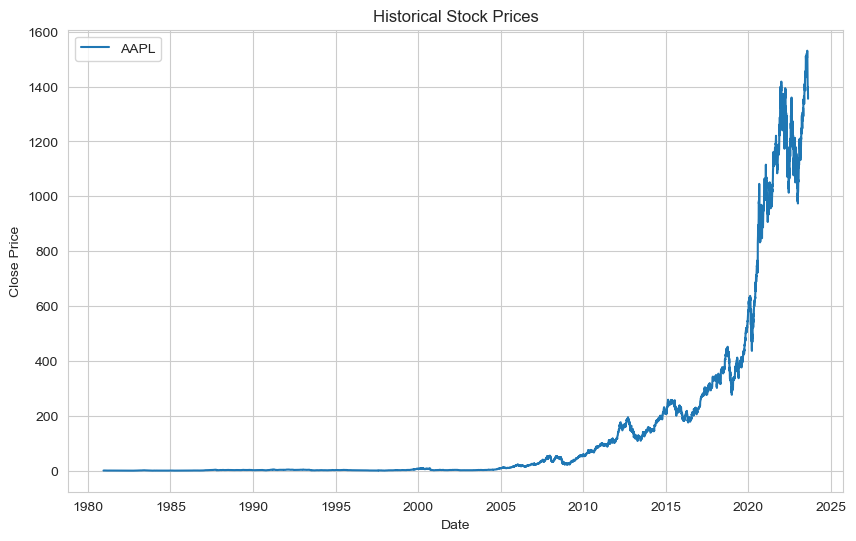

In [83]:
# Utilisation de la classe
folder_path = r"data\raw"

stocks = StockData(folder_path)
stocks.infos()
apple_data = stocks.get_historical_data('AAPL',from_date="2020-1-1",to_date="2020-10-1")




stocks.plot_stocks(["AAPL"],normalize=True)

In [84]:
apple_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker
9847,2020-01-02,74.059998,75.150002,73.797501,75.087502,73.249031,135480400,AAPL
9848,2020-01-03,74.287498,75.144997,74.125000,74.357498,72.536896,146322800,AAPL
9849,2020-01-06,73.447502,74.989998,73.187500,74.949997,73.114883,118387200,AAPL
9850,2020-01-07,74.959999,75.224998,74.370003,74.597504,72.771019,108872000,AAPL
9851,2020-01-08,74.290001,76.110001,74.290001,75.797501,73.941650,132079200,AAPL


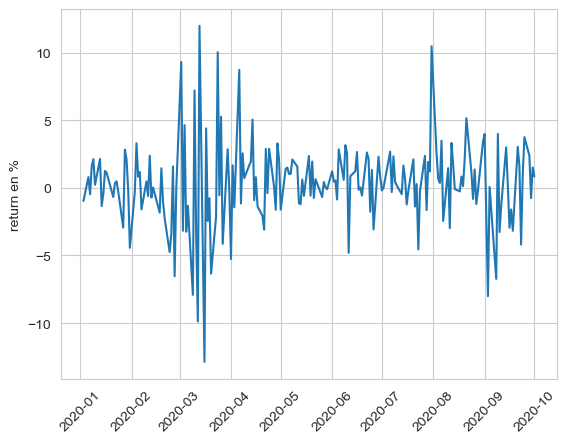

In [89]:





plt.plot(apple_data['Date'], apple_data['Daily Return'] * 100)


plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1)) 

plt.ylabel('return en %')
plt.xticks(rotation=45) 
plt.show()





